<a href="https://colab.research.google.com/github/HaHyunkyung/Seoul_bus_station/blob/main/4_%EA%B5%AC%EB%B3%84_%EC%97%85%EC%A2%85%EB%93%B1%EB%A1%9D_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 생활정보 기반 대중교통 수요 분석

<center>
<img src='https://drive.google.com/uc?id=1Nf_jhqGMXA8eRFVe0PbJXzkk1d6SbZK8' /></br>
</center>

---

# 목차
#### 1. 구별 버스정류장 분석
#### 2. 구별 유동 인구 분석
#### 3. 구별 주민등록인구 분석
## 4. 구별 업종 등록 분석 ✔

In [ ]:
%pip install pandas seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[기본 데이터]
* 1.4 business_type_202401.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터(제공 가능한 최신 버전)
    * 택시 운송업 (개인택시 등록자 주거지)
    * 한식일반음식점업
    * 용달 화물자동차 운송업(개인용달 등록자 주거지)
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기

In [ ]:
import pandas as pd

seoul_business = pd.read_csv('/content/drive/MyDrive/[KT] 서울시 생활정보 기반 대중교통 수요 분석/실습/1.4 business_type_202401.csv',sep=",", encoding = 'UTF-8')

In [ ]:
seoul_business.shape

(451, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

In [ ]:
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

In [ ]:
seoul_business.describe()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
count,451,451,451,451,451,451,451,451,451,451,...,451,451,451,451,451,451,451,451,451,451
unique,27,425,226,280,176,305,177,180,142,205,...,131,239,69,147,127,189,113,222,107,230
top,송파구,소계,71,11,24,104,56,56,40,54,...,13,16,-,-,18,20,4,42,17,45
freq,28,25,7,7,11,6,8,9,11,9,...,18,8,82,82,14,10,15,10,16,9


In [ ]:
display(seoul_business.head())
display(seoul_business.tail())

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
446,강동구,성내3동,120,120,135,390,73,73,104,163,...,54,133,10,86,57,103,66,199,44,164
447,강동구,둔촌2동,117,436,63,249,89,89,61,108,...,34,85,10,788,21,39,35,90,24,101
448,강동구,암사1동,209,372,71,195,153,153,67,107,...,29,59,3,6,47,98,31,67,34,98
449,강동구,천호2동,157,187,152,509,144,151,97,188,...,63,212,4,17,95,268,24,42,69,245
450,강동구,길동,"1,441","1,557",152,436,217,225,146,237,...,71,228,6,126,122,294,39,136,70,224


#### 데이터 확인 및 처리

* 두번째 행부터 데이터가 시작된다.

In [ ]:
seoul_business = pd.read_csv('/content/drive/MyDrive/[KT] 서울시 생활정보 기반 대중교통 수요 분석/실습/1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
seoul_business.head()

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,두발미용업.1,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
1,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636","18,080","36,214","16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
2,종로구,소계,215,215,"1,548","5,912",618,646,549,889,261,480,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
3,종로구,사직동,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220
4,종로구,삼청동,5,5,42,145,4,4,9,10,-,-,66,243,2,3,3,8,-,-,7,33


In [ ]:
# 구별 등록 업종 중 버스정류장 설치에 중요한 업종 데이터만 불러오기
seoul_business = seoul_business.iloc[:,[0,1,5,13,17]]
seoul_business.head()

,자치구,동,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,자치구,동,종사자수,종사자수,종사자수
1,합계,합계,"100,183","57,322","31,371"
2,종로구,소계,"5,912","3,613","1,413"
3,종로구,사직동,982,525,177
4,종로구,삼청동,145,243,8


In [ ]:
# '동' 열이 '소계'인 행만을 필터링 (구별 데이터만 필요함)
seoul_business = seoul_business[seoul_business['동'] == '소계'].reset_index(drop = True)

In [ ]:
# '동' 열 제거
seoul_business = seoul_business.drop('동', axis=1)

In [ ]:
seoul_business.head()

,자치구,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,종로구,"5,912","3,613","1,413"
1,중구,"6,414","3,542",982
2,용산구,"2,987","2,076","1,332"
3,성동구,"2,785","1,859",621
4,광진구,"2,861","1,887","1,577"


In [ ]:
seoul_business.to_csv("df_seoul_business.csv", index = False)

---

In [ ]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


#### 데이터 분포 알아보기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 타입 확인 및 조건부 변환
for column in ['한식 일반 음식점업.1', '커피전문점.1', '기타주점업.1']:
    if seoul_business[column].dtype == 'object':
        seoul_business[column] = pd.to_numeric(seoul_business[column].str.replace(',', ''), errors='coerce')

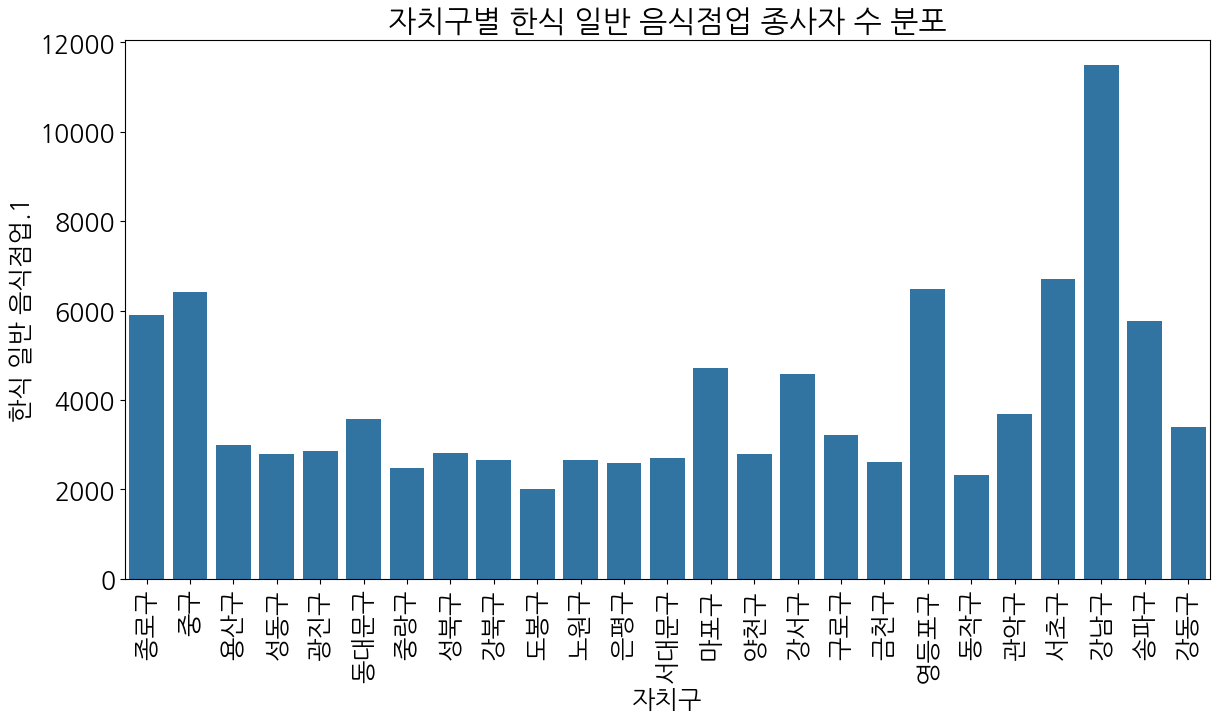

In [ ]:
# 자치구별 한식 일반 음식점업 종사자 수 분포
plt.figure(figsize=(14, 7))
sns.barplot(x='자치구', y='한식 일반 음식점업.1', data=seoul_business)
plt.title('자치구별 한식 일반 음식점업 종사자 수 분포')
plt.xticks(rotation=90)
plt.show()

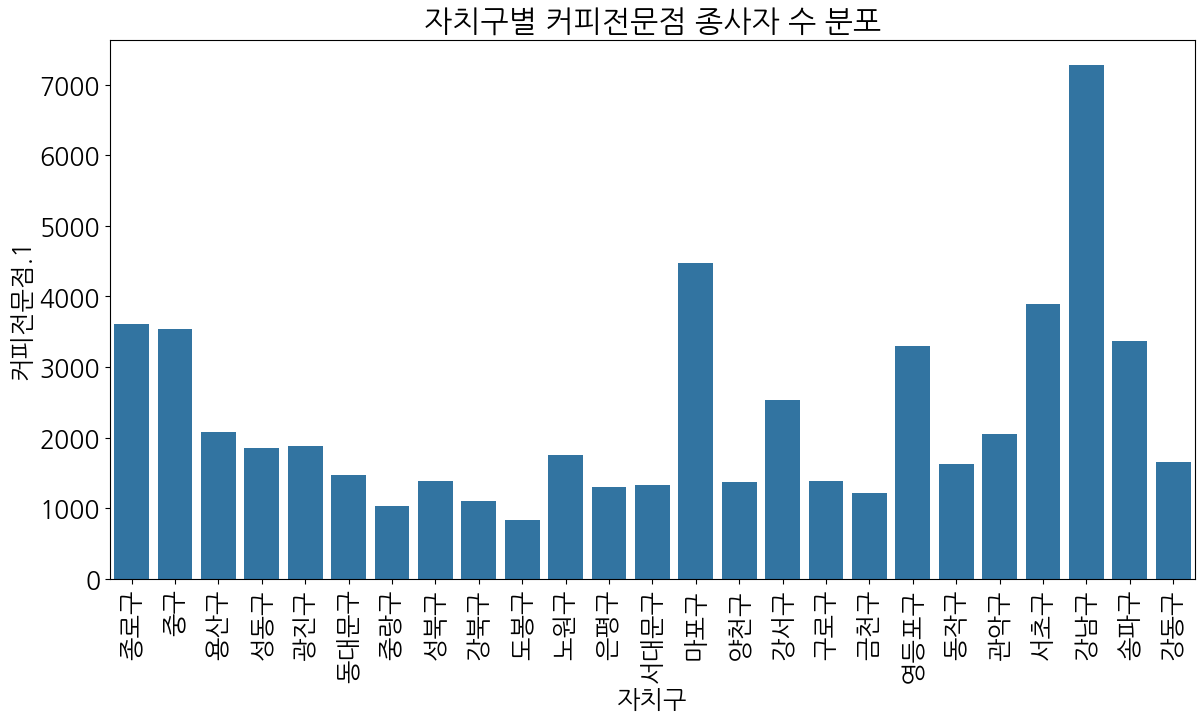

In [ ]:
# 자치구별 커피전문점 종사자 수 분포
plt.figure(figsize=(14, 7))
sns.barplot(x='자치구', y='커피전문점.1', data=seoul_business)
plt.title('자치구별 커피전문점 종사자 수 분포')
plt.xticks(rotation=90)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '종로구'),
  Text(1, 0, '중구'),
  Text(2, 0, '용산구'),
  Text(3, 0, '성동구'),
  Text(4, 0, '광진구'),
  Text(5, 0, '동대문구'),
  Text(6, 0, '중랑구'),
  Text(7, 0, '성북구'),
  Text(8, 0, '강북구'),
  Text(9, 0, '도봉구'),
  Text(10, 0, '노원구'),
  Text(11, 0, '은평구'),
  Text(12, 0, '서대문구'),
  Text(13, 0, '마포구'),
  Text(14, 0, '양천구'),
  Text(15, 0, '강서구'),
  Text(16, 0, '구로구'),
  Text(17, 0, '금천구'),
  Text(18, 0, '영등포구'),
  Text(19, 0, '동작구'),
  Text(20, 0, '관악구'),
  Text(21, 0, '서초구'),
  Text(22, 0, '강남구'),
  Text(23, 0, '송파구'),
  Text(24, 0, '강동구')])

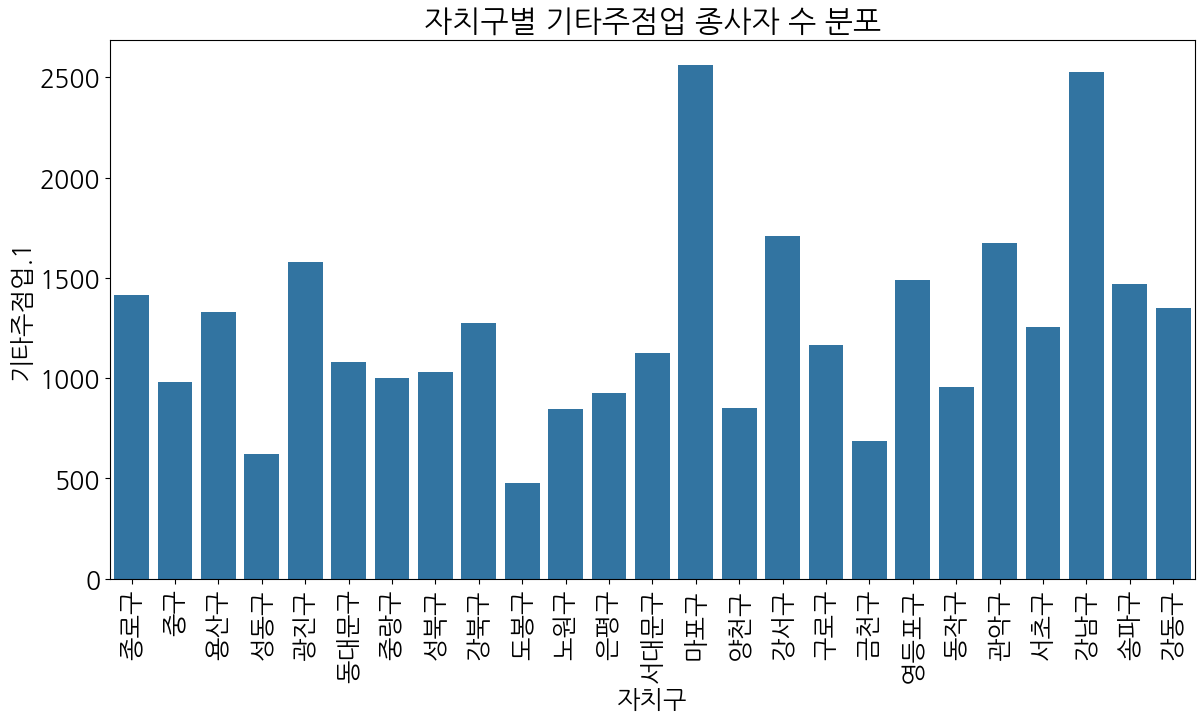

In [ ]:
# 자치구별 기타주점업 종사자 수 분포
plt.figure(figsize=(14, 7))
sns.barplot(x='자치구', y='기타주점업.1', data=seoul_business)
plt.title('자치구별 기타주점업 종사자 수 분포')
plt.xticks(rotation=90)

## **1. 한식 일반 음식점**

**주요 자치구**

 강남구와 서초구의 음식점 수가 가장 많음. 특히 강남구는 12,000명 이상으로 가장 높은 수치를 기록.

**상대적으로 낮은 자치구**

강동구와 금천구는 상대적으로 음식점 수가 적음. 이러한 차이는 지역의 인구 밀도나 경제적 요인과 관련이 있을 수 있음.

## **2. 커피 전문점**

**주요 자치구**

역시 강남구가 가장 많은 수치를 보이며, 이를 통해 강남구가 카페 문화가 발달한 지역임을 알 수 있음.

**다양한 자치구**

여러 자치구에서 커피 전문점 수가 고르게 분포되어 있지만, 특히 용산구와 마포구가 두드러짐.

## **3. 기타 주점 업종**

**주요 자치구**

 서초구와 마포구가 가장 많은 수치를 보이며, 다양한 주점 업종이 존재함.

**상대적인 분포**

자치구별로 비교적 균일하게 분포되어 있으나, 강남구와 서초구가 여전히 높은 수치를 기록.
종합 인사이트

**강남구와 서초구**

대부분의 식음료 업종에서 높은 수치를 기록하여, 이 지역이 소비 활동이 활발한 것으로 분석됨.

**인구 및 경제적 요인**

자치구 간 차이는 인구 밀도, 소득 수준, 소비 성향 등 다양한 요인에 기인할 수 있음.

**사업 기회**
 상대적으로 적은 수치를 보이는 지역은 새로운 음식점이나 카페 등을 개설할 수 있는 기회가 있을 수 있음.